In [38]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot  as plt
from random import sample


In [115]:
df = pd.read_csv('data.csv')
df

,x,y
0,54,1
1,56,2
2,102,11
3,3,2
4,24,33
...,...,...
95,9,92
96,48,84
97,64,24
98,32,32


# **Cosine Similarity and Matrix**

In [137]:
temp = np.array(df)
cosine_similarity = np.zeros((len(temp), len(temp)))
for i in range(len(temp)):
    for j in range(i+1, len(temp)):
        similarity = np.dot(temp[i], temp[j]) / (np.linalg.norm(temp[i]) * np.linalg.norm(temp[j]))
        cosine_similarity[i][j] = similarity
        cosine_similarity[j][i] = similarity
cosine_similarity

array([[0.        , 0.99985238, 0.99604997, ..., 0.94266984, 0.72007789,
        0.68925746],
       [0.99985238, 0.        , 0.99742859, ..., 0.94826473, 0.73189397,
        0.70160425],
       [0.99604997, 0.99742859, 0.        , ..., 0.96857935, 0.77884743,
        0.75086792],
       ...,
       [0.94266984, 0.94826473, 0.96857935, ..., 0.        , 0.91036648,
        0.89153278],
       [0.72007789, 0.73189397, 0.77884743, ..., 0.91036648, 0.        ,
        0.99905616],
       [0.68925746, 0.70160425, 0.75086792, ..., 0.89153278, 0.99905616,
        0.        ]])

# **Euclidean Distance**

In [105]:
temp = np.array(df)
euclidean_sim = np.zeros((len(temp), len(temp)))
for x in range(len(temp)):
    for y in range(x, len(temp)):
        euclidean_similarity = np.linalg.norm(temp[x] - temp[y])
        euclidean_sim[x][y] = euclidean_similarity
        euclidean_sim[y][x] = euclidean_similarity

euclidean_sim

array([[ 0.        ,  2.23606798, 49.03060269, ..., 25.07987241,
        38.01315562, 44.38468204],
       [ 2.23606798,  0.        , 46.87216658, ..., 23.40939982,
        38.41874542, 46.09772229],
       [49.03060269, 46.87216658,  0.        , ..., 40.16217126,
        73.08214556, 91.00549434],
       ...,
       [25.07987241, 23.40939982, 40.16217126, ...,  0.        ,
        32.984845  , 54.34151268],
       [38.01315562, 38.41874542, 73.08214556, ..., 32.984845  ,
         0.        , 29.        ],
       [44.38468204, 46.09772229, 91.00549434, ..., 54.34151268,
        29.        ,  0.        ]])

# **Choosing first centroids randomly**

In [117]:
def get_random_centroid_indices(num_temp, num_centroids):
    return sample(range(num_temp), num_centroids)


# **labeling**

In [118]:
def assign_labels(temp, centroids, similarity_matrix):

    num_temp = len(temp)
    num_centroids = len(centroids)
    labels = np.zeros(num_temp)
    for i in range(num_temp):
        min_similarity = float('inf')
        closest_centroid = None
        for j in range(num_centroids):
            centroid_index = centroids[j]
            similarity = similarity_matrix[i][centroid_index]
            if similarity < min_similarity:
                min_similarity = similarity
                closest_centroid = j
        labels[i] = closest_centroid
    return labels.astype(int)

# **Stop**

In [119]:
def calculate_error(centroids, labels, similarity_matrix):

    num_points = len(labels)
    error = 0
    for i in range(num_points):
        centroid_index = labels[i]
        similarity = similarity_matrix[i][centroid_index]
        error += 1 - similarity
    return error / num_points


def is_converged(iterations, max_iterations, old_centroids, centroids, similarity_matrix):

    if iterations >= max_iterations:
        return True
    if old_centroids is not None:
        old_labels = assign_labels(temp, old_centroids, similarity_matrix)
        new_labels = assign_labels(temp, centroids, similarity_matrix)
        old_error = calculate_error(old_centroids, old_labels, similarity_matrix)
        new_error = calculate_error(centroids, new_labels, similarity_matrix)
        if new_error >= old_error:
            return True
    return False

# **Selecting New Centroids**

In [131]:

def update_centroids(temp, labels, centroids, similarity_matrix):
    num_centroids = len(centroids)
    new_centroids = []
    for i in range(num_centroids):
      for j in range(len(temp)):
        if (labels[j] == i):
          cluster_temp = temp[j]
          nearest_similarity = float('inf')
          nearest_index = None
      for j in range(len(temp)):
          if similarity_matrix[i][j] < nearest_similarity:
              nearest_similarity = similarity_matrix[i][j]
              nearest_index = j
      new_centroids.append(nearest_index)
    return new_centroids


# **KMeans**

In [134]:
def kmeans(temp, k, similarity_matrix, max_iterations=100):

    centroids = get_random_centroid_indices(len(temp), k)
    old_centroids = None
    labels = assign_labels(temp, centroids, similarity_matrix)
    iterations = 0
    while not is_converged(iterations, max_iterations, old_centroids, centroids, similarity_matrix):
        old_centroids = centroids
        centroids = update_centroids(temp, labels, centroids, similarity_matrix)
        labels = assign_labels(temp, centroids, similarity_matrix)
        iterations += 1
    return centroids, labels

# **Clustering with Euclidean Similarity**

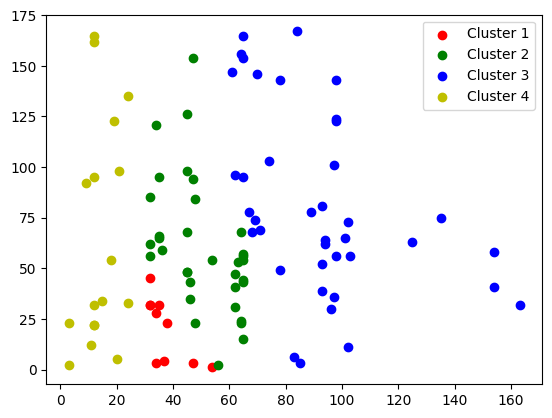

In [133]:
centroids, labels = kmeans(temp, 4, euclidean_sim, 100)

x = {i: [] for i in range(len(centroids))}
y = {i: [] for i in range(len(centroids))}
for i in range(len(temp)):
    cluster_index = labels[i]
    x[cluster_index].append(temp[i][0])
    y[cluster_index].append(temp[i][1])

fig, ax = plt.subplots()
colors = ['r', 'g', 'b', 'y']
for i in range(len(centroids)):
    ax.scatter(x[i], y[i], color=colors[i], label=f'Cluster {i+1}')
ax.legend()
plt.show()

# **Clustering with Cosine Similarity**

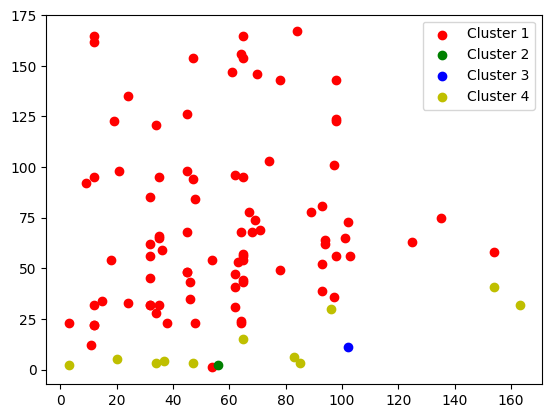

In [139]:
centroids, labels = kmeans(temp, 4, cosine_similarity, 100)

x = {i: [] for i in range(len(centroids))}
y = {i: [] for i in range(len(centroids))}
for i in range(len(temp)):
    cluster_index = labels[i]
    x[cluster_index].append(temp[i][0])
    y[cluster_index].append(temp[i][1])

fig, ax = plt.subplots()
colors = ['r', 'g', 'b', 'y']
for i in range(len(centroids)):
    ax.scatter(x[i], y[i], color=colors[i], label=f'Cluster {i+1}')
ax.legend()
plt.show()